In [67]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
from adjustText import adjust_text

In [68]:
adata = sc.read_h5ad('results/adata_pseudobulk_signatures.h5ad')
adata

AnnData object with n_obs × n_vars = 40 × 10
    obs: 'source'
    var: 'stage', 'source'
    uns: 'source_colors', 'stage_colors'

In [69]:
sc.pp.scale(adata)
sc.pp.pca(adata)

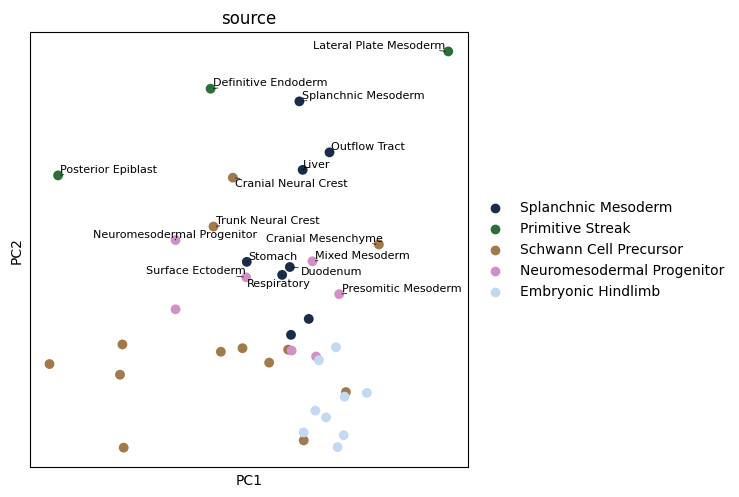

In [96]:
fig, ax = plt.subplots(1, 1, figsize = (5.66, 5.66))
sc.pl.pca(adata, color = 'source', size = 200, ax = ax, show = False)

label_msk = (adata.obsm['X_pca'][:, 1] > 0)
labels = [None] * label_msk.sum()
for i, ix in enumerate(adata[label_msk].obs_names):
    labels[i] = ax.text(*adata[label_msk].obsm['X_pca'][i, :2], ix, fontsize = 8, ha = 'center', va = 'center')
adjust_text(labels, arrowprops = {'arrowstyle' : '-', 'color' : 'k', 'lw' : .5})

dset_summary = pd.read_csv('../data/summary.csv', index_col = 0).sort_index()
dset_labels = dset_summary['name'].to_dict()
handles, labels = ax.get_legend_handles_labels()
labels = np.vectorize(dset_labels.get)(labels)
ax.legend(handles, labels, loc = 'center left', bbox_to_anchor = (1, .5), frameon = False)
plt.show()

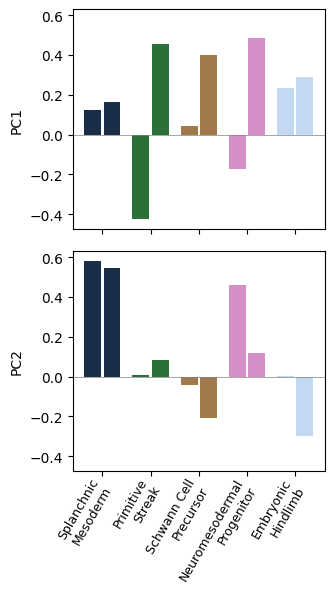

In [103]:
w_group, w_bar, g_bar, xx, bar_colors = 1, .35, .05, np.arange(dset_summary.shape[0]), adata.uns['source_colors']
fig, ax = plt.subplots(2, 1, figsize = (3.25, 6), sharex = True, sharey = True, gridspec_kw = {'hspace': .1})
w_half = (w_bar / 2) + (g_bar / 2)
for i in np.arange(2):
    for stage, shift in (('early', -w_half), ('late', w_half)):
        ax[i].bar(xx + shift, adata[:, adata.var.stage == stage].varm['PCs'][:, i], width = w_bar, color = bar_colors)
    ax[i].axhline(0, color = 'gray', lw = .5)
    ax[i].set_ylabel(f'PC{i + 1}')

ax[1].set_xticks(xx)
xticklabels = ['\n'.join(v.rsplit(' ', 1)) if len(v) > 15 and ' ' in v else v for v in dset_labels.values()]
ax[1].set_xticklabels(xticklabels, rotation = 60, ha = 'right', va = 'center', rotation_mode = 'anchor', fontsize = 9)
ax[1].tick_params('x', pad = 5)
plt.show()

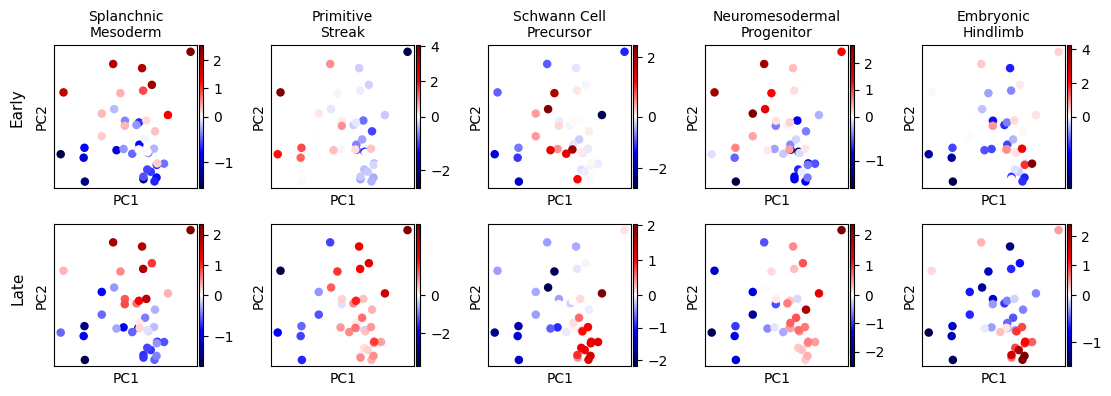

In [104]:
fig, ax = plt.subplots(2, dset_summary.shape[0], figsize = (11, 4), sharex = True, sharey = True)
for i, stage in enumerate(adata.var.stage.cat.categories):
    for j, dset in enumerate(adata.var.source.cat.categories):
        sc.pl.pca(adata, color = f'{dset}_{stage}', size = 150, vcenter = 0, cmap = 'seismic', ax = ax[i, j], show = False)
        if i == 0:
            ax[i, j].set_title(xticklabels[j], size = 10)
        else:
            ax[i, j].set_title('')
        ax[i, j].set_box_aspect(1)

fig.text(0, .725, 'Early', size = 11, rotation = 90, va = 'center', ha = 'center')
fig.text(0, .275, 'Late', size = 11, rotation = 90, va = 'center', ha = 'center')
plt.tight_layout()
plt.show()